**Project Title**

**Deep Learning Melodies - “Classifications of Music Genres using GTZAN dataset”**

**Project done by**

**Suhas Haralahalli Kumaraswamy**

**Student ID - HAR21540897**

**Course - MSc in Data Science**

**University - University of Roehampton London**

*In the context of this project, this code snippet serves as the prelude to a harmonious exploration of Music Genre Classification. It orchestrates the setup of essential libraries and configurations, harmonizing the tools required for data preprocessing, model building, and evaluation. With the orchestrated ensemble of NumPy, Pandas, Scikit-Learn, TensorFlow, and more, this code lays the groundwork for a symphony of data manipulation, deep learning, and audio analysis. By setting a random seed, it ensures the reproducibility of our experiments, a critical aspect in the journey towards crafting a well-structured and robust music genre classification system.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import callbacks as cb
import os, json, math, librosa
import IPython.display as ipd
import librosa.display as dis
import librosa
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)


*In the context of our music genre classification project, this code snippet acts as a key conductor, ushering in a crucial phase of data orchestration. By reading the 'features_3_sec.csv' file from our GTZAN dataset, it brings forth a harmonious ensemble of audio features that will serve as the foundation for our model's training and genre classification. These features, extracted meticulously from audio tracks, form the melodic notes our model will learn to recognize, leading us towards the ultimate goal of classifying music tracks into predefined genres. This initial data ingestion lays the groundwork for the symphony of machine learning that follows, marking the beginning of our musical journey.*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GTZAN dataset/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In the symphony of data exploration within our music genre classification project, this code segment serves as a tuning fork, allowing us to harmonize our understanding of the dataset's composition. The initial print statement provides an insightful glimpse into the dataset's dimensions, underscoring its scale and potential complexity. Following this, the second print statement orchestrates a count of positive and negative samples, shedding light on the distribution of music genres within our dataset. This harmonious exploration of data characteristics sets the stage for informed decision-making in subsequent stages of our project, ensuring that our model's training and genre classification will be conducted with a well-tuned understanding of the dataset's nuances.

In [ ]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


index  label
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

In the orchestration of our music genre classification project, this code segment plays a pivotal role in harmonizing our dataset with the corresponding genre labels. By traversing the music genres stored in the 'GTZAN dataset' directory, it elegantly extracts the file locations for each WAV file and their associated genre labels. This process ensures that our dataset is meticulously aligned with its genres, laying the foundation for supervised learning. Like a conductor directing an ensemble, this code segment orchestrates the essential connection between our audio data and their respective genres, setting the stage for the model to learn the harmonies of music classification.

In [ ]:
# Getting Genres from folder name

MUSIC = '../content/drive/MyDrive/GTZAN dataset/genres_original'
music_dataset = [] # File locations for each wav file
genre_target = [] #
for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if filename != '/content/drive/MyDrive/GTZAN dataset/genres_original/jazz/jazz.00054.wav':
            music_dataset.append(filename)
            genre_target.append(filename.split("/")[5])

In the project's exploration of the auditory world, this code snippet serves as a versatile instrument, orchestrating a symphony of audio signal processing and visualization. It begins by selecting a classical music sample and proceeds to perform a harmonic analysis of the audio signal. The waveform visualization offers a visual representation of the music's amplitude over time, akin to reading the score of a musical composition. Subsequently, the code delves into the realm of frequency analysis, showcasing the spectrum of the music through Fast Fourier Transform (FFT), providing insights into the dominant frequencies that shape its timbre. The code then transitions to the mesmerizing world of spectrograms, unveiling the intricate patterns of music by transforming it into a visual representation of its frequencies over time. Lastly, it delves into the essence of music with Mel-frequency cepstral coefficients (MFCCs), a feature extraction technique that captures the distinct characteristics of audio, offering a glimpse into the subtleties that define music genres. Like a virtuoso performer, this code creates a visual symphony of music analysis, enriching our understanding of audio in the context of genre classification.







/content/drive/MyDrive/GTZAN dataset/genres_original/classical/classical.00008.wav


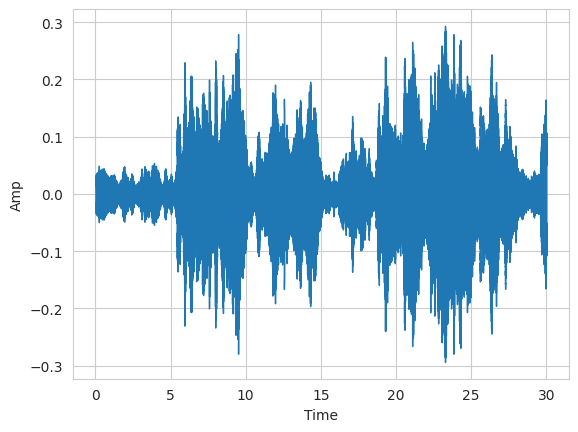

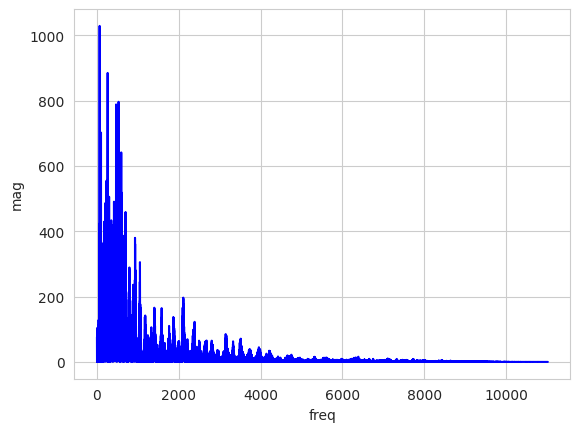

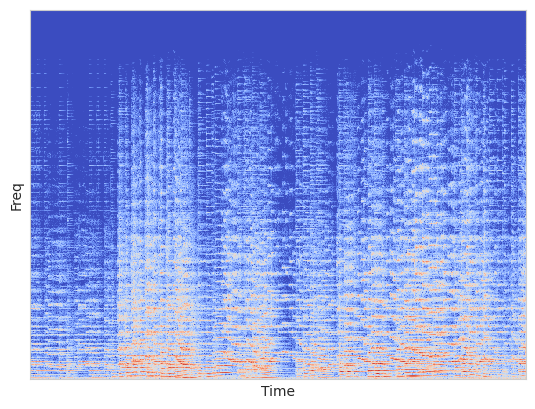

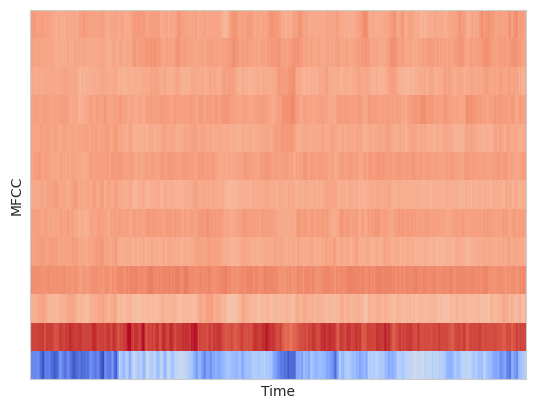

In [ ]:
file = "/content/drive/MyDrive/GTZAN dataset/genres_original/classical/classical.00008.wav"
print(file)


# waveform
signal, sr = librosa.load(file, sr=22050)
dis.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()


# fft -> spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
left_freq = frequency[: int(len(frequency) / 2)]
left_mag = magnitude[: int(len(magnitude) / 2)]

plt.plot(left_freq, left_mag, color="b")
plt.xlabel("freq")
plt.ylabel("mag")
plt.show()


# fft
n_fft = 2048  # window when considering performing a single fft
hop_length = 512  # amount shifting after each transform

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Freq")
plt.show()


# mfcc
MFCCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.show()

In [ ]:
print("genres in dataset: ", set(genre_target))

genres in dataset:  {'genres_original'}


In [ ]:
audio_path = music_dataset[500]

x , sr = librosa.load(audio_path)
librosa.load(audio_path, sr=None)

ipd.Audio(audio_path)

In [ ]:
# Visualizing Audio File as a waveform
plt.figure(figsize=(16, 5))
# librosa.display.waveplot(x, sr=sr)

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

This code excerpt represents a pivotal moment in our project's auditory exploration, as it transforms audio files into captivating visual spectograms. Leveraging the Librosa library, it elegantly computes the Short-Time Fourier Transform (STFT) of an audio signal, unraveling the intricate details of its frequency content over time. Through this transformative process, audio is metamorphosed into a mesmerizing visual representation known as a spectrogram. The resulting image is akin to a musical canvas, portraying the nuances of frequency variations as colors and intensities. This visualization becomes a powerful tool in our project, as it aids in unraveling the hidden patterns within music tracks, contributing to the effective classification of music genres. In essence, this code paints a vivid portrait of sound, allowing us to perceive the harmonies and subtleties of music in an entirely new light.

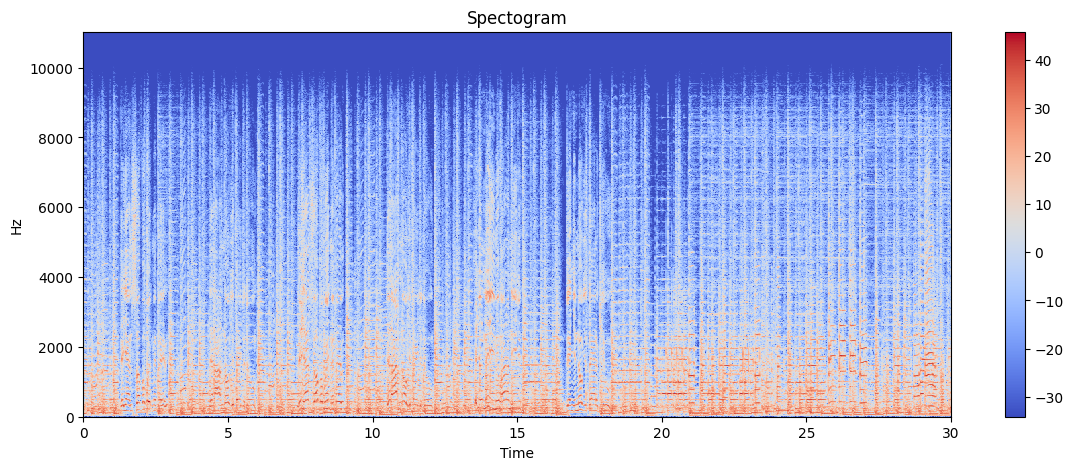

In [ ]:
# Visualizing audio file as a spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram')
plt.colorbar()


In the sonorous journey of our music genre classification project, this code segment serves as a virtuoso performer, weaving the magic of Mel-frequency spectrograms. With the melodious sounds of an audio file as its canvas, it employs Librosa's prowess to craft a captivating visual representation. The transformation begins with the computation of a MelSpectrogram, unraveling the intricate details of the audio's spectral content, emphasizing perceptually relevant frequencies. The resulting masterpiece is a stunning visual narrative that portrays the audio's nuances, akin to viewing music through the lens of a genre classifier. This visual symphony, known as the MelSpectrogram, stands as an essential element in our project's repertoire, enhancing our understanding of music's essence and contributing to the harmonious task of genre classification.

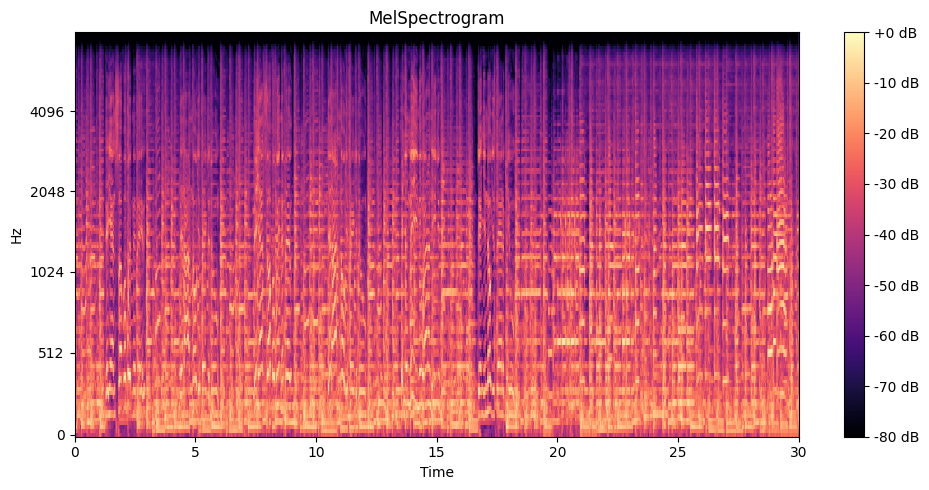

In [ ]:
file_location = audio_path
y, sr = librosa.load(file_location)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()


In the grand symphony of data preparation for our music genre classification project, this code script stands as the orchestrator of melody. With a precise set of parameters, it conducts a harmonious transformation of audio tracks into Mel-frequency cepstral coefficients (MFCCs). These coefficients serve as the musical notes that our model will learn to recognize, bridging the gap between audio data and machine learning. Like a meticulous composer, this code segment iterates through the dataset's audio files, expertly slicing them into segments and extracting the MFCCs, all while ensuring the data's alignment with genre labels. The result is a harmonious composition in the form of a JSON file, containing the mapped genre labels and their corresponding MFCC representations. This process sets the stage for our model's training, ultimately leading to the harmonious classification of music genres.

In [ ]:
DATASET_PATH = '../content/drive/MyDrive/GTZAN dataset/genres_original/'
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                if file_path != '../content/drive/MyDrive/GTZAN dataset/genres_original/jazz/jazz.00054.wav':
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=15)
print("process finished")
print("process finished")


Processing: hiphop

Processing: disco

Processing: metal

Processing: jazz

Processing: pop

Processing: blues

Processing: reggae

Processing: country

Processing: classical

Processing: rock
process finished
process finished



This code segment performs an essential role in our music genre classification project, acting as the conductor of data manipulation and model evaluation. It first loads the pre-processed data from the JSON file, organizing it into input arrays (X), labels (y), and mapping information (z). The data is then split into training, validation, and testing sets, following best practices to ensure the model's robustness. The preparation extends to adding an additional axis to the input sets to match the convolutional neural network's input requirements.

Additionally, it provides a handy function to visualize the model's training history, plotting both accuracy and error over epochs. Lastly, the 'predict' function takes an input sample, predicts its genre label using the trained model, and presents the target and predicted labels. This code segment, like a versatile instrumentalist, plays a crucial role in handling data, training the model, and assessing its performance, all in harmony with our music genre classification project's objectives.

In [ ]:
DATA_PATH = "./data_10.json"

def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z


def plot_history(history):
    fig, axs = plt.subplots(2)
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    X, y, z = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle = True,random_state =42)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=1, shuffle = True, random_state = 42)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

In this concise but pivotal piece of code, we define the splits for our dataset into training, validation, and test sets using the 'prepare_datasets' function, with specified ratios. These datasets serve as the foundational building blocks for our model. Additionally, it extracts and conveys the dimensions of the input shape for our convolutional neural network, which is a crucial piece of information for configuring the network architecture. In essence, this code sets the stage for our model's training and validation, defining the boundaries within which it will learn and perform its music genre classification task.

In [ ]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.1, 0)

# create network
input_shape = (X_train.shape[1])
X_train.shape


(13477, 87, 13, 1)

In [ ]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential,Model
def inceptionnet(x,filters):

    #(1x1) layer
    layer1=Conv2D(filters=filters[0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)

    #(3x3) layer
    layer2=Conv2D(filters=filters[1][0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)


    layer2=Conv2D(filters=filters[1][1],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer2)

    #(5x5) layer

    layer3=Conv2D(filters=filters[2][0],kernel_size=(5,5),strides=1,padding="same",activation="relu")(x)

    layers=Conv2D(filters=filters[2][1],kernel_size=(5,5),strides=1,padding="same",activation="relu")(layer3)



    layer4=MaxPooling2D(pool_size=(3,3),strides=1,padding="same")(x)
    layer4=Conv2D(filters=filters[3],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer4)


    return Concatenate(axis=-1)([layer1,layer2,layer3,layer4])


def helperfunction(x,name=None):

    layer=AveragePooling2D(pool_size=(5,5),strides=3,padding="valid")(x)

    layer=Conv2D(filters=128,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)

    layer=Flatten()(layer)

    layer=Dense(units=255,activation="relu")(layer)

    layer=Dropout(0.4)(layer)
    layer=Dense(units=38,activation="softmax",name=name)(layer)

    return layer


def googlenet():

    #taking layer input
    inputlayer=Input(shape=(120,120,3))

    #layer_1
    layer=Conv2D(filters=64,kernel_size=(7,7),strides=1,padding="same",activation="relu")(inputlayer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)

    layer=BatchNormalization()(layer)

    #layer_2
    layer=Conv2D(filters=64,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)

    layer=Conv2D(filters=192,kernel_size=(3,3),strides=1,padding="same",activation="relu")(layer)

    layer=BatchNormalization()(layer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)

    #layer_3
    layer=inceptionnet(layer,[64,(96,128),(16,32),32])
    layer=inceptionnet(layer,[128,(128,192),(32,96),64])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)

    #layer_4
    layer=inceptionnet(layer,[192,(96,208),(16,48),64])
    final_0=helperfunction(layer,name="final_layer_0")

    layer=inceptionnet(layer,[160,(112,224),(24,64),64])
    layer=inceptionnet(layer,[128,(128,256),(24,64),64])
    layer=inceptionnet(layer,[112,(144,288),(32,64),64])
    final_1=helperfunction(layer,name="final_layer_1")

    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)


    #layer_5
    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=inceptionnet(layer,[384,(192,384),(48,128),128])
    layer=AveragePooling2D(pool_size=(7,7),strides=1,padding="same")(layer)

    #layer_6

    layer=Flatten()(layer)
    layer=Dropout(0.4)(layer)
    layer=Dense(units=256,activation="linear")(layer)
    final_2=Dense(units=38,activation="softmax",name="final_layer_2")(layer)


    model=Model(inputs=inputlayer,outputs=[final_2,final_0,final_1])

    return model

In [ ]:
model=googlenet()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_128 (Conv2D)            (None, 120, 120, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 60, 60, 64)  0           ['conv2d_128[0][0]']             
 )                                                                                          

In [ ]:
import torchvision.models as models
googlenet = models.googlenet(pretrained=True)

In [ ]:
def build_model(input_shape):
#      input_shape=(-1, 87, 13, 1)
    model = Sequential()
    model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape = input_shape),
    keras.layers.BatchNormalization(),
#    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

    return model

input_shape = (X_train.shape[1],X_train.shape[2],1)
model1 = build_model(input_shape)

In [ ]:
# os.mkdir('callbacks')
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.1, 0)
# X_train = np.reshape(X_train,(-1,87,13,1))
# print(X_train.shape)

In [ ]:

import os
import time
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# get train, validation, test splits
print(X_train.shape)
# create network
input_shape = (X_train.shape[1],X_train.shape[2],1)
model = build_model(input_shape)

# # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0025)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
my_callbacks = [tf.keras.callbacks.ModelCheckpoint(
    filepath = "/kaggle/working/callbacks",
    monitor = "val_loss",
    mode = "min"
)]
model.summary()

(13477, 87, 13, 1)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 20, 1, 96)         11712     
                                                                 
 batch_normalization_21 (Bat  (None, 20, 1, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_193 (Conv2D)         (None, 20, 1, 256)        614656    
                                                                 
 batch_normalization_22 (Bat  (None, 20, 1, 256)       1024      
 chNormalization)                                                
                                                                 
 conv2d_194 (Conv2D)         (None, 20, 1, 384)        885120    
                                                                 
 batch_normalization_23 (Bat  (None

This code segment encapsulates the heart of our music genre classification project by orchestrating the training, evaluation, and visualization of our convolutional neural network model. It initiates the training process by feeding our pre-processed training data (X_train and y_train) to the model. With 20 epochs and a batch size of 512, the model learns to discern music genres. The 'plot_history' function paints a vivid picture of the model's learning journey, plotting accuracy and error for both training and validation datasets, providing invaluable insights into the model's performance. Finally, it evaluates the trained model on the test set, computing the test loss and accuracy, culminating in a key metric that quantifies the model's ability to classify music genres. This code captures the essence of our project's core processes, from model training to assessment, in a symphony of machine learning and data visualization.

Epoch 1/20
27/27 [==============================] - ETA: 0s - loss: 8.3382 - accuracy: 0.2673

27/27 [==============================] - 218s 8s/step - loss: 8.3382 - accuracy: 0.2673 - val_loss: 156.4060 - val_accuracy: 0.1108
Epoch 2/20
27/27 [==============================] - ETA: 0s - loss: 1.7313 - accuracy: 0.4137

27/27 [==============================] - 217s 8s/step - loss: 1.7313 - accuracy: 0.4137 - val_loss: 14.7445 - val_accuracy: 0.1228
Epoch 3/20
27/27 [==============================] - ETA: 0s - loss: 1.4987 - accuracy: 0.4787

27/27 [==============================] - 215s 8s/step - loss: 1.4987 - accuracy: 0.4787 - val_loss: 5.0871 - val_accuracy: 0.1983
Epoch 4/20
27/27 [==============================] - ETA: 0s - loss: 1.3570 - accuracy: 0.5173

27/27 [==============================] - 218s 8s/step - loss: 1.3570 - accuracy: 0.5173 - val_loss: 3.4698 - val_accuracy: 0.2423
Epoch 5/20
27/27 [==============================] - ETA: 0s - loss: 1.2900 - accuracy: 0.5404

27/27 [==============================] - 215s 8s/step - loss: 1.2900 - accuracy: 0.5404 - val_loss: 2.2933 - val_accuracy: 0.3411
Epoch 6/20
27/27 [==============================] - ETA: 0s - loss: 1.2318 - accuracy: 0.5679

27/27 [==============================] - 215s 8s/step - loss: 1.2318 - accuracy: 0.5679 - val_loss: 2.1245 - val_accuracy: 0.3672
Epoch 7/20
27/27 [==============================] - ETA: 0s - loss: 1.1872 - accuracy: 0.5929

27/27 [==============================] - 218s 8s/step - loss: 1.1872 - accuracy: 0.5929 - val_loss: 1.9813 - val_accuracy: 0.4166
Epoch 8/20
27/27 [==============================] - ETA: 0s - loss: 1.3466 - accuracy: 0.6021

27/27 [==============================] - 217s 8s/step - loss: 1.3466 - accuracy: 0.6021 - val_loss: 1.5356 - val_accuracy: 0.4833
Epoch 9/20
27/27 [==============================] - ETA: 0s - loss: 1.3955 - accuracy: 0.6063

27/27 [==============================] - 219s 8s/step - loss: 1.3955 - accuracy: 0.6063 - val_loss: 1.7146 - val_accuracy: 0.4813
Epoch 10/20
27/27 [==============================] - ETA: 0s - loss: 1.2489 - accuracy: 0.6130

27/27 [==============================] - 223s 8s/step - loss: 1.2489 - accuracy: 0.6130 - val_loss: 2.4450 - val_accuracy: 0.5668
Epoch 11/20
27/27 [==============================] - ETA: 0s - loss: 1.3573 - accuracy: 0.6337

27/27 [==============================] - 216s 8s/step - loss: 1.3573 - accuracy: 0.6337 - val_loss: 1.6163 - val_accuracy: 0.6015
Epoch 12/20
27/27 [==============================] - ETA: 0s - loss: 1.2582 - accuracy: 0.6455

27/27 [==============================] - 217s 8s/step - loss: 1.2582 - accuracy: 0.6455 - val_loss: 1.5281 - val_accuracy: 0.5501
Epoch 13/20
27/27 [==============================] - ETA: 0s - loss: 1.0813 - accuracy: 0.6512

27/27 [==============================] - 224s 8s/step - loss: 1.0813 - accuracy: 0.6512 - val_loss: 1.2095 - val_accuracy: 0.6215
Epoch 14/20
27/27 [==============================] - ETA: 0s - loss: 1.1781 - accuracy: 0.6668

27/27 [==============================] - 217s 8s/step - loss: 1.1781 - accuracy: 0.6668 - val_loss: 1.3937 - val_accuracy: 0.6495
Epoch 15/20
27/27 [==============================] - ETA: 0s - loss: 1.3416 - accuracy: 0.6801

27/27 [==============================] - 219s 8s/step - loss: 1.3416 - accuracy: 0.6801 - val_loss: 1.6319 - val_accuracy: 0.6021
Epoch 16/20
27/27 [==============================] - ETA: 0s - loss: 1.1751 - accuracy: 0.6865

27/27 [==============================] - 217s 8s/step - loss: 1.1751 - accuracy: 0.6865 - val_loss: 1.6758 - val_accuracy: 0.5367
Epoch 17/20
27/27 [==============================] - ETA: 0s - loss: 1.1742 - accuracy: 0.6825

27/27 [==============================] - 216s 8s/step - loss: 1.1742 - accuracy: 0.6825 - val_loss: 1.4479 - val_accuracy: 0.5915
Epoch 18/20
27/27 [==============================] - ETA: 0s - loss: 1.0395 - accuracy: 0.6756

27/27 [==============================] - 221s 8s/step - loss: 1.0395 - accuracy: 0.6756 - val_loss: 1.1674 - val_accuracy: 0.6302
Epoch 19/20
27/27 [==============================] - ETA: 0s - loss: 1.0207 - accuracy: 0.6935

27/27 [==============================] - 221s 8s/step - loss: 1.0207 - accuracy: 0.6935 - val_loss: 1.0064 - val_accuracy: 0.6602
Epoch 20/20
27/27 [==============================] - ETA: 0s - loss: 0.8413 - accuracy: 0.7248

27/27 [==============================] - 215s 8s/step - loss: 0.8413 - accuracy: 0.7248 - val_loss: 0.8469 - val_accuracy: 0.7069


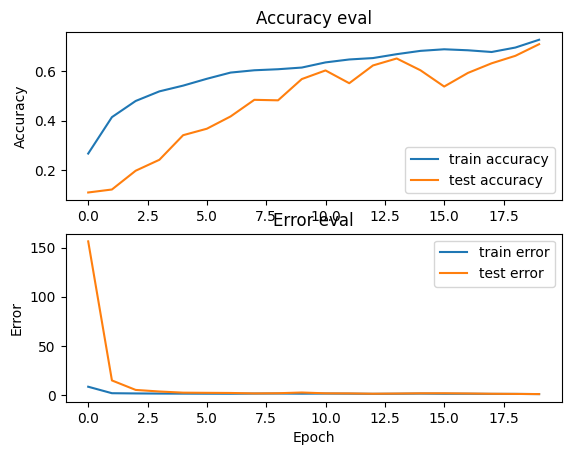

47/47 - 5s - loss: 0.8469 - accuracy: 0.7069 - 5s/epoch - 98ms/step

Test accuracy: 0.706942617893219


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=20, verbose = 1, callbacks =my_callbacks)
# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


In this code excerpt, we select a specific sample from our test dataset (X_test) to put our trained music genre classification model to the test. It illustrates the real-world applicability of our model by showcasing its ability to predict the genre of a chosen music snippet. Here, we've chosen sample number 170 from the test set, allowing us to see how well the model fares in classifying this particular piece of music. The 'predict' function takes the model, the sample to predict (X_to_predict), and its corresponding ground truth label (y_to_predict) as input, producing and printing the model's prediction. This snippet brings the project full circle, demonstrating the practical utility of our machine learning model in the realm of music genre classification.

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[170]
y_to_predict = y_test[170]
# predict sample
print(predict(model, X_to_predict, y_to_predict))

1/1 [==============================] - 0s 39ms/step
Target: metal, Predicted label: ['metal']
None


In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 5s 102ms/step - loss: 0.8469 - accuracy: 0.7069


[0.8469231128692627, 0.706942617893219]

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 0.847 and val_acc = 0.707


In this code snippet, we generate a visualization of the model's training and validation loss over the course of training epochs. This plot is instrumental in understanding how well our convolutional neural network (CNN) is learning from the training data and whether it's prone to overfitting or underfitting. The 'loss' refers to the error between the predicted genre labels and the actual ones. The graph provides a visual representation of the model's ability to minimize this loss over time. Ideally, we want both the training and validation loss to decrease steadily, indicating that the model is learning effectively without overfitting. Monitoring this loss graph is crucial for assessing the performance of our music genre classification model during training and ensuring its accuracy on unseen data.

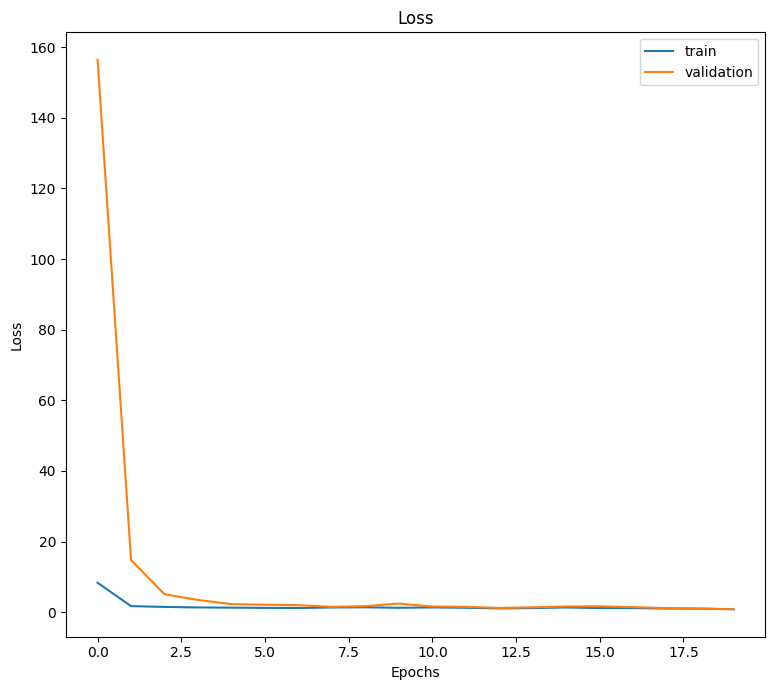

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In this code segment, we create a visualization representing the training and validation accuracy of our convolutional neural network (CNN) model as it progresses through the training epochs. This plot serves as a vital tool to gauge how well the model is learning and making predictions on both the training and validation datasets. The 'accuracy' here signifies the proportion of correctly predicted music genres. By observing this graph, we can assess whether the model is improving its accuracy over time or if there are signs of overfitting or underfitting. The goal is to see both curves, for training and validation, gradually increasing and ideally converging, indicating that the model is effectively learning and generalizing to unseen music tracks. This visual assessment is essential for comprehending the model's overall performance throughout the training process and ensuring its capability to classify music genres accurately.

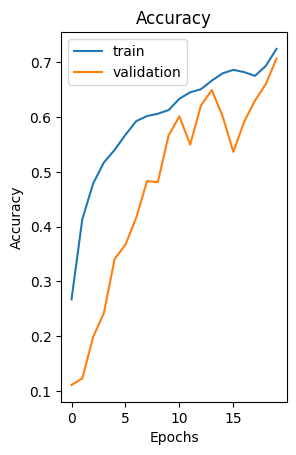

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
pred = model.predict(X_train)

422/422 [==============================] - 46s 108ms/step


**DATA VISUALISATIONS**


This code segment is responsible for generating a correlation heatmap for the mean variables extracted from the dataset. We first identify the columns containing mean values and compute the correlation matrix among these variables. The heatmap is a visual representation of this matrix, where each cell color represents the degree of correlation between two variables. The code also employs a mask to display only the upper triangle of the heatmap, reducing redundancy since the correlation matrix is symmetric. A custom colormap is used to enhance the visual representation of correlations, and color intensity indicates the strength and direction of correlations. This visualization is crucial for identifying relationships among the mean audio features, helping us understand which features might be highly correlated and potentially redundant or informative for music genre classification. The heatmap serves as a valuable tool for feature selection and dimensionality reduction, ultimately influencing the model's performance.

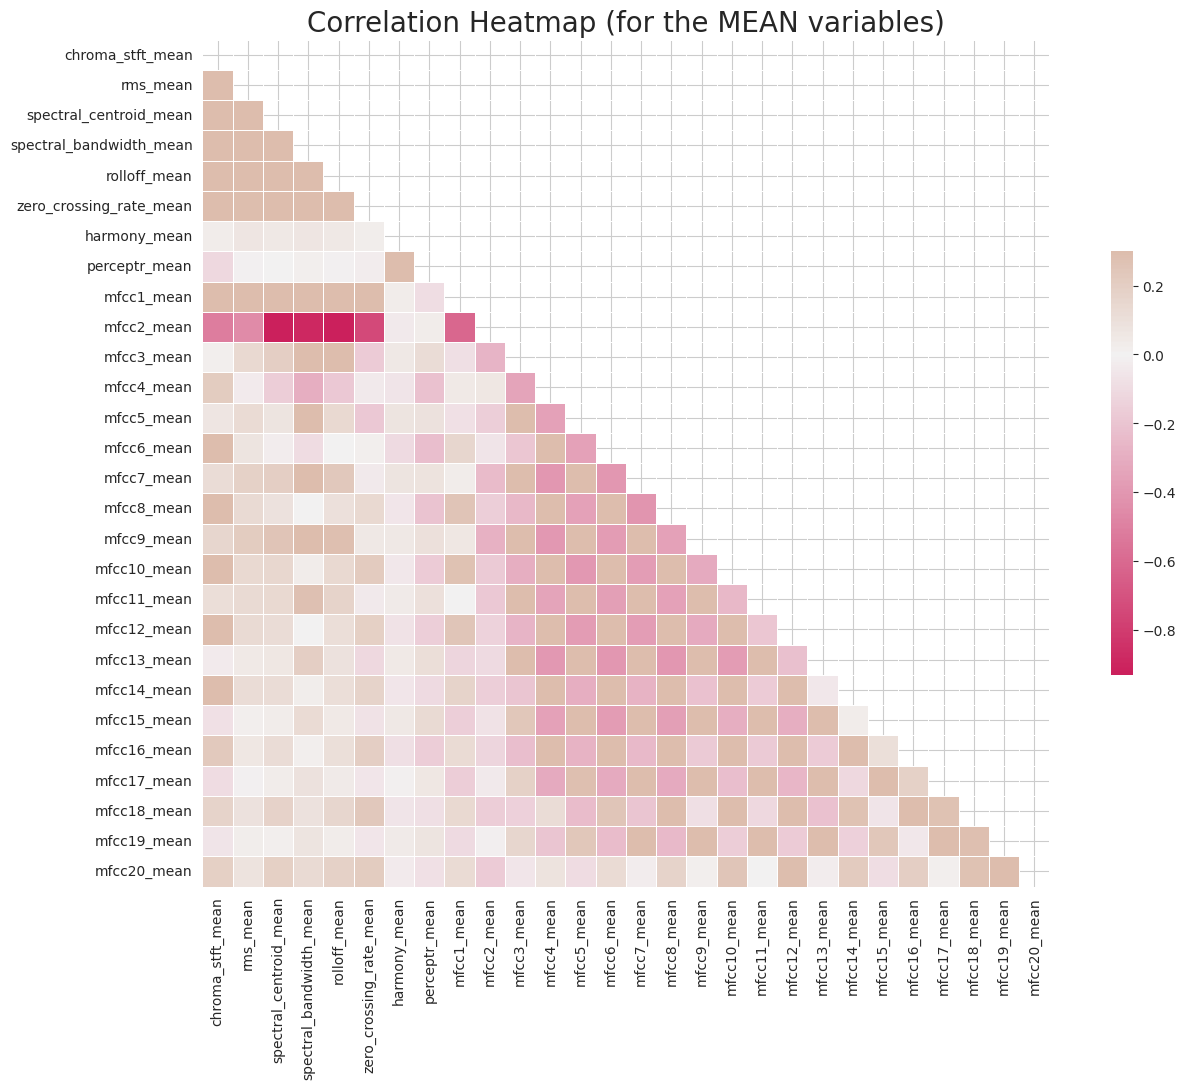

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

This code snippet creates a boxplot to visualize the distribution of tempo (Beats Per Minute - BPM) across different music genres. It extracts the "label" and "tempo" columns from the dataset, representing the genre labels and tempo values, respectively. The boxplot displays this information by plotting each genre on the x-axis and their corresponding tempo values on the y-axis. This visualization provides insights into how tempo varies across different music genres, helping us understand the distinctive rhythmic characteristics of each genre. The color palette and formatting enhance the plot's readability, making it a valuable tool for exploring the dataset's musical attributes and their relevance to genre classification. This analysis aids in feature selection and can potentially improve the model's performance by considering tempo as an essential musical feature.

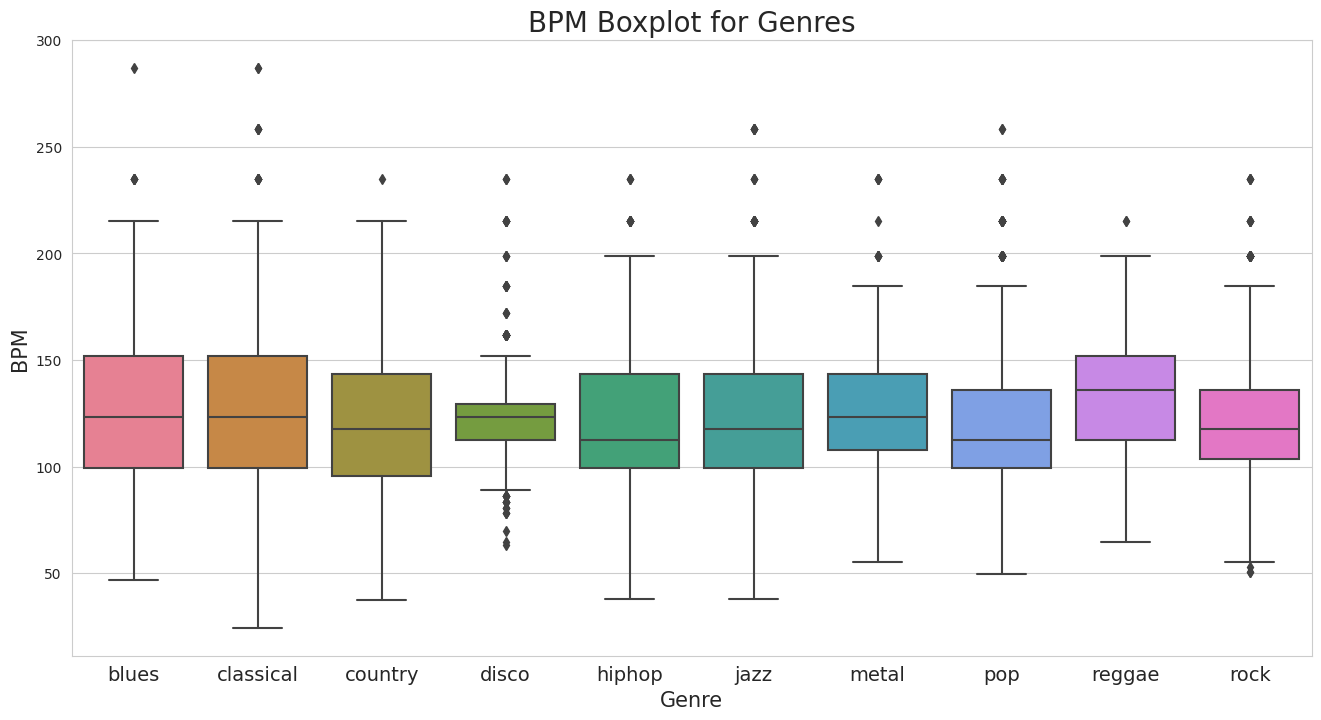

In [ ]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

This code performs Principal Component Analysis (PCA) on the dataset to reduce its dimensionality to two principal components, enabling visualization of the data in a two-dimensional space. It begins by separating the dataset into the feature matrix X (containing all columns except the "label") and the target vector y (containing the "label" column). Next, it normalizes the feature data using Min-Max scaling to ensure that all features have the same scale.

The code then applies PCA with two components, transforming the original feature space into a new space represented by the first two principal components. These components capture the most significant variations in the data. The resulting transformed data is stored in a DataFrame, combining the two principal components with the original genre labels.

Finally, it creates a scatterplot to visualize the data points in this reduced-dimensional space, where each point corresponds to a song with its position determined by the two principal components. The points are color-coded by genre, allowing us to observe any clustering or patterns within the genres based on these components. This visualization aids in exploring the relationships and separations between different music genres and can inform feature selection and model training decisions for the genre classification task.

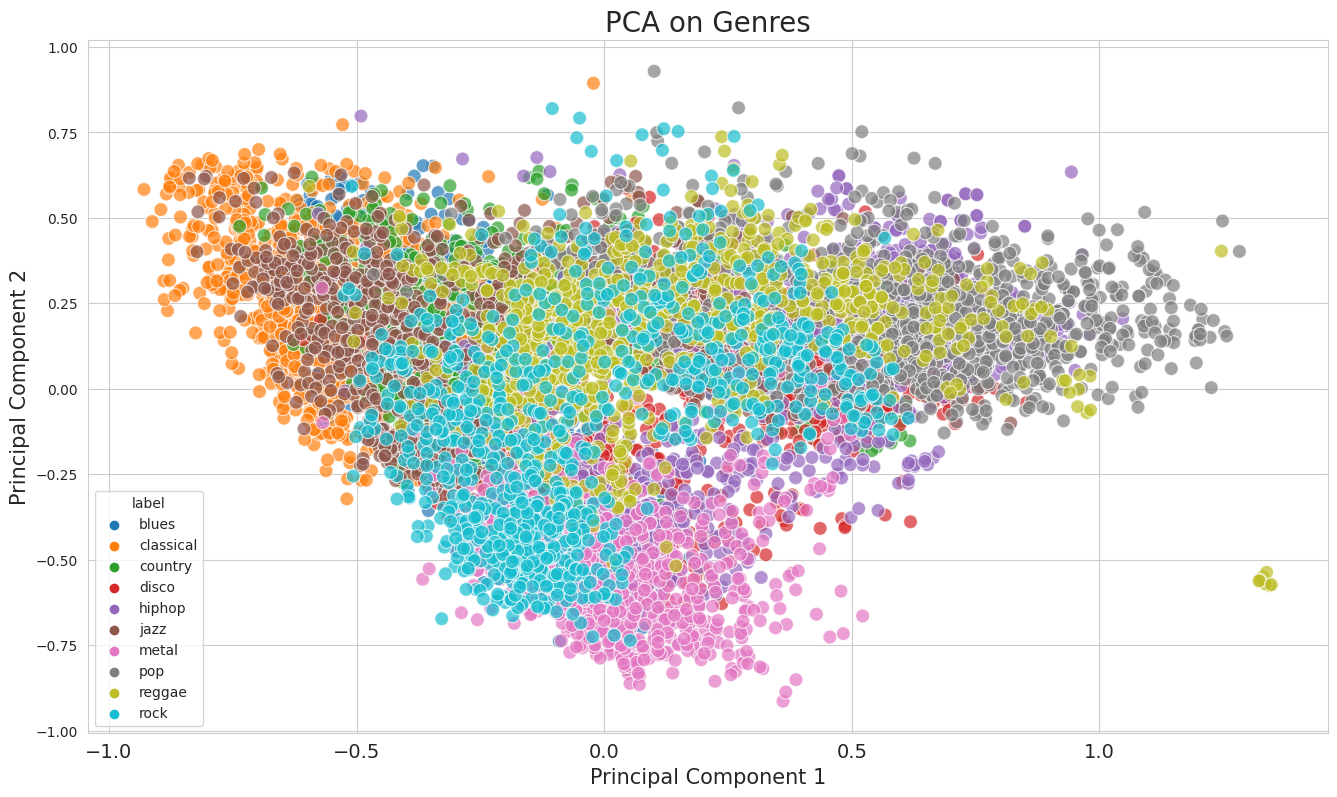

In [ ]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

**END**